# Experimenting with the tutorial

**Overview**
This exercise is related to the week 4 tutorial.
 
The individual tasks will ask you to either reflect on parts of the tutorial or modify specific code cells from the tutorial. Specifically, [Task 2](#project) and [Task 3](#ls) require modifications to the code of the tutorial notebook.
 


<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#copy">Task 1: Copy notebook</a>
            </li>
            <li>
            <a href="#project">Task 2: Projection experiments</a>
            </li>
            <li>
            <a href="#ls">Task 3: Linear Least Squares Experiments</a>
            </li>
            <li>
            <a href="#ls1">Task 4: Linear Least Squares Reflections</a>
            </li>
            <li>
            <a href="#poly">Task 5: Second-order polynomial</a>
            </li>
            <li>
            <a href="#pmatrix">Task 6: Projection matrix</a>
            </li>
        </ul>
    </div>
</article>


---
**Task 1 (easy): Copy notebook**
Copy the tutorial notebook
 in the repository. 
This makes it easy to go back to the original in case something goes wrong.

---
---
**Task 2 (easy): Projection experiments👩‍💻📽️**
This task builds on the $\textbf{Projections}$ section in the tutorial.
1. Search and identify comment `##1`
. 
2. Change the values of the matrix $A$ (below comment `##1`
) to modify the line. Experiment with different values and observe how the projection changes in the plot.
3. Change the matrix $A$, such that $PX$ ≈ $X$ (that is the projection leaves $X$ almost unchanged). 
4. Search and identify comment `##2`
.
5. Set the matrix $A$  = $\begin{bmatrix} 1 \\ 0.5 \end{bmatrix}$, then apply the projection matrix $P$ twice, i.e. calculate $PPX$ (just below the comment). How does this affect the projected points?


---

P:
 [[0.8 0.4]
 [0.4 0.2]]
projected points:
 [[1.6  2.2  2.88]
 [0.8  1.1  1.44]]


Text(0, 0.5, 'Y coordinates')

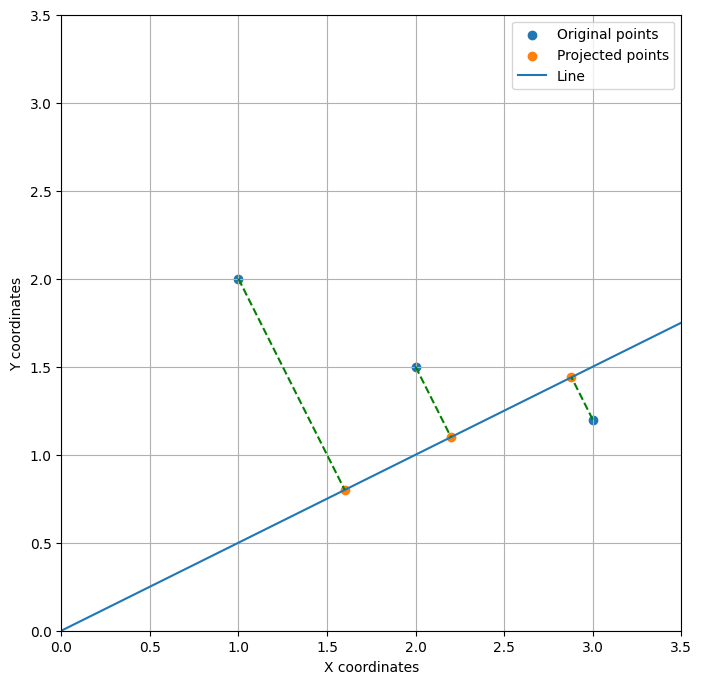

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# Write your solution here
# Three points
X = np.array([
    [1, 2],
    [2, 1.5],
    [3, 1.2]
]).T

# Make line points (remember Numpy broadcasting)
x = np.linspace(0, 4)
f_x = x * 0.5

##1
#The line l written as the design matrix
A = np.array([[1, 0.5]]).T
# A = np.array([[1, 0], [0, 1]]).T  #  has to be a column vector

##2
## construct projection matrix
P = (A @ np.linalg.inv(A.T @ A)) @ A.T
print("P:\n", P)

#projection the points with matrix multiplication
x_prime = P @ P @ X
print("projected points:\n", x_prime)

# Creating a square figure (makes it easier to visually confirm projection)
plt.figure(figsize=(8, 8))

plt.scatter(X[0, :], X[1, :], label="Original points")  # Old points
plt.scatter(x_prime[0, :], x_prime[1, :], label="Projected points")  # Projected points
plt.plot(x, f_x, label="Line")  # Line
plt.legend()

# Gather old and projected points in a single array
P1 = np.concatenate([X.T[:, :].reshape(1, 3, 2), x_prime.T[:, :].reshape(1, 3, 2)], axis=0)
# Plot projection/error lines
plt.plot(P1[:, 0, 0], P1[:, 0, 1], 'g--')
plt.plot(P1[:, 1, 0], P1[:, 1, 1], 'g--')
plt.plot(P1[:, 2, 0], P1[:, 2, 1], 'g--')
# Add grid lines
plt.grid(True)
# Set axes limits to be the same for equal aspect ratio
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")

In [ ]:
# 1: Identified
# 2: Changes which line the points are projected onto.
# 3: Identity matrix
# 4: Identified
# 5: double projected points are the same as the projected points.
## makes sense, as projecting a point in the vector space onto the vector space
## is just the same exact point!


---
**Task 3 (easy): Linear Least Squares Experiments👩‍💻**
This task builds on the $\textbf{Linear Least Squares}$ section in the tutorial.
1. Search and identify comment `##3`
.
2. Change the values of the first point in the matrix `X`
 such that it gradually moves further and further away from the line. Observe how it affects the error $RMS$.
3. Add two points to `X`
 and observe how they affect the fitted line and the error.


---

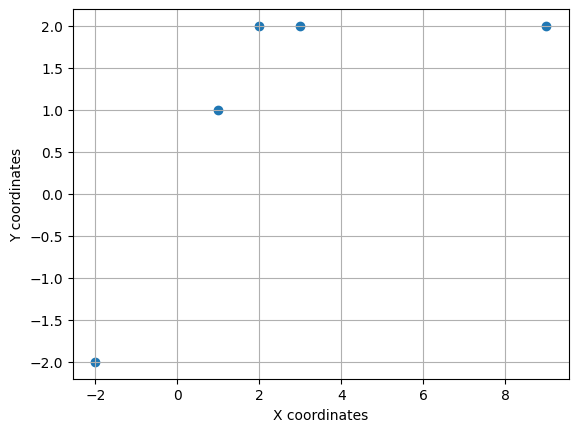

In [32]:
# Write your solutions here
## 3
# Define the example points
X = np.array([
    [-2, -2],
    [1, 1],
    [2, 2],
    [3, 2],
    [9, 2]
]).T

plt.grid(True)
plt.scatter(X[0, :], X[1, :])
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
# Display the plot
plt.show()

In [33]:
x_vals = X[0, :]
y_vals = X[1, :]

A = np.vstack((x_vals, np.ones(x_vals.shape))).T
print("A\n", A)

P = np.linalg.inv(A.T @ A) @ A.T
# Applying the transformation
w = P @ y_vals
print("w:", w)

# Calculating the projected y-values
y_hat = A @ w

# Calculating the error
diff = y_vals - y_hat
e = np.sqrt(diff @ diff.T)
print("e", e)

diff = y_vals - y_hat
rms = np.sqrt((diff @ diff.T) / len(diff)) # correction - mean does not work as it is applied after multiplying vectors
print("root mean squared error", rms)

A
 [[-2.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 9.  1.]]
w: [0.30674847 0.20245399]
e 2.4217825407840867
root mean squared error 1.0830540775830748


In [ ]:
# 1: Identified
# 2: Observations:
## RMSE(1, 1) = 0.23570226039551595
## RMSE(0, 0) = 0.3086066999241838
## RMSE(-1, -1) = 0.33968311024337877
## RMSE(-2, -2) = 0.35634832254989907
# 3: RMSE: 1.0830540775830748, E: 2.4217825407840867


---
**Task 4 (easy): Linear Least Squares Reflections💡📽️**
1. How can you change the two additional points so the fitted line does not move?
2. What happens to the error when removing all but two points from `X`
?
3. What happens when you remove all but one point from `X`
?
4. Reflect on how the quality of the data affects the projection and thus the solution. 


---

In [0]:
# Write your reflections here
# 1: Add points on the fitted line of the initial points
# 2: Error becomes 0, as we can fit two points exactly
# 3: Line cannot be fitted exactly : there are infinite solutions to this
# 4: The more exact the data (i.e. less noise) the better a fitting line we will get
## also, the more data points we get the better an idea we will have of the actual correlation

## Pen and paper exercises
A 2. order polynomial is given by 

$$f(x) = w_0 + w_1x + w_2x^2 = \sum^2_{i=0} w_ix^i.$$

Generally, an $N$'th order  polynomial is given by

$$f(x) = \sum^N_{i=0} w_ix^i,$$
where $\mathbb{w}$ is a vector of coefficients.

---
**Task 5 (medium): Second-order polynomial♾️📽️**
1. Identify the knowns and unknowns in the polynomial above.
2. Is the function linear or non-linear in $\mathbb{w}$?
3. Is the function linear or non-linear in $\mathbb{x}$?
4. Provide the outline of an algorithm for fitting a second-order polynomial using linear least squares.
5. Generalize this algorithm to n-th order polynomials.


---

In [34]:
# Write your solution here
# 1: unknowns: weights, knowns: (xi, yi)
# 2: Linear in w
# 3: Non-linear in x
# 4: define A = [x^2 x 1] and project the y-vector onto the subspace spanned by A.
## Let the projection coordinates represent the weights of the function.
# 5: define A as the matrix with column vectors corresponding to each degree n -> 0.
## Project the y-vector onto the subspace spanned by A and let the projection coordinates
## represent the weights of the function.


---
**Task 6 (medium): Projection matrix♾️**
The projection matrix $P = A(A^\top A )^{-1}A^\top$ is, under certain conditions, equal to the identity matrix.
1. Give an example of a design matrix $A$ for which $P=I$.
2. Explain why projection matrices are usually not identity matrices.
3. (optional) Prove a condition for which $P=I$. Hint: when is $A^\top A=I$?.


---

In [ ]:
# Write your solution here
# Any invertible square matrix
# First of all, we usually have more odd dimensions